# Exploratory Data Analysis for Sports - IPL(Indian Premier League) 

Dataset time period: 2008 - 2019  
Dataset: https://drive.google.com/file/d/18iDDIIZGt8eWxzqbyMIqcn5X7bHINuLw/view


## Data Preparation and Cleaning


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
matches = pd.read_csv("C:/Users/DISHAA/Downloads/Indian Premier League/matches.csv")
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
deliveries = pd.read_csv("C:/Users/DISHAA/Downloads/Indian Premier League/deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [6]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [8]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [9]:
matches['venue'].unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [10]:
matches['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [11]:
# The dataset has two names for the same team 'Rising Pune Supergiants'
deliveries = deliveries.replace(to_replace="Rising Pune Supergiant", value="Rising Pune Supergiants") 
matches = matches.replace(to_replace="Rising Pune Supergiant", value="Rising Pune Supergiants") 

# 'Delhi Daredevils' renamed to 'Delhi Capitals'
deliveries = deliveries.replace(to_replace="Delhi Daredevils", value ="Delhi Capitals") 
matches = matches.replace(to_replace="Delhi Daredevils", value="Delhi Capitals") 

# 'Sunrisers Hyderabad' replaced 'Deccan Chargers'
deliveries = deliveries.replace(to_replace="Deccan Chargers", value ="Sunrisers Hyderabad") 
matches = matches.replace(to_replace="Deccan Chargers", value="Sunrisers Hyderabad") 

#Filling Null values 
matches['winner'] = matches['winner'].fillna("No Result")
matches['umpire1'] = matches['umpire1'].fillna("Not Available")
matches['umpire2'] = matches['umpire2'].fillna("Not Available")
matches['player_of_match'] = matches['player_of_match'].fillna("No Result")

# Combining similar names of stadium
matches = matches.replace(to_replace="Rajiv Gandhi International Stadium, Uppal", value ="Rajiv Gandhi Intl. Cricket Stadium")
matches = matches.replace(to_replace="Punjab Cricket Association IS Bindra Stadium, Mohali", value ="Punjab Cricket Association Stadium, Mohali")
matches = matches.replace(to_replace="M Chinnaswamy Stadium", value ="M. Chinnaswamy Stadium")
matches = matches.replace(to_replace="IS Bindra Stadium", value ="Punjab Cricket Association Stadium, Mohali")
matches = matches.replace(to_replace="Feroz Shah Kotla", value ="Feroz Shah Kotla Ground")
matches = matches.replace(to_replace="ACA-VDCA Stadium", value ="Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium")
matches = matches.replace(to_replace="MA Chidambaram Stadium, Chepauk", value ="M. A. Chidambaram Stadium")

In [12]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


 * 756 matches were held between 2008 and 2019.
 * The maximum margin by which a team won match was 146 runs while batting first.
 * The maximum margin by which a team won match was 10 wickets while bowing first.

In [13]:
# column 'upmire3' has a significant num of NaN values, so we drop it
matches = matches.drop(columns=['umpire3'], axis=1)

## Exploratory Analysis and Visualization

#### Winner of highest number of matches in each season

In [14]:
teams = matches.groupby('season')['winner'].value_counts()
teams

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Capitals                  7
        Mumbai Indians                  7
                                       ..
2019    Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
        No Result                       1
Name: winner, Length: 103, dtype: int64

In [15]:
year = 2008
wins_per_season = pd.DataFrame(columns=['year','team','wins'])
for items in teams.iteritems():
    if items[0][0]==year:
        print(items)
        wins = pd.DataFrame({
        'year': [items[0][0]],
        'team': [items[0][1]],
        'wins': [items[1]]
        })
        wins_per_season = wins_per_season.append(wins)
        year +=1

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Capitals'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


In [16]:
wins_per_season

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Capitals,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


#### Frequency of matches played in each season

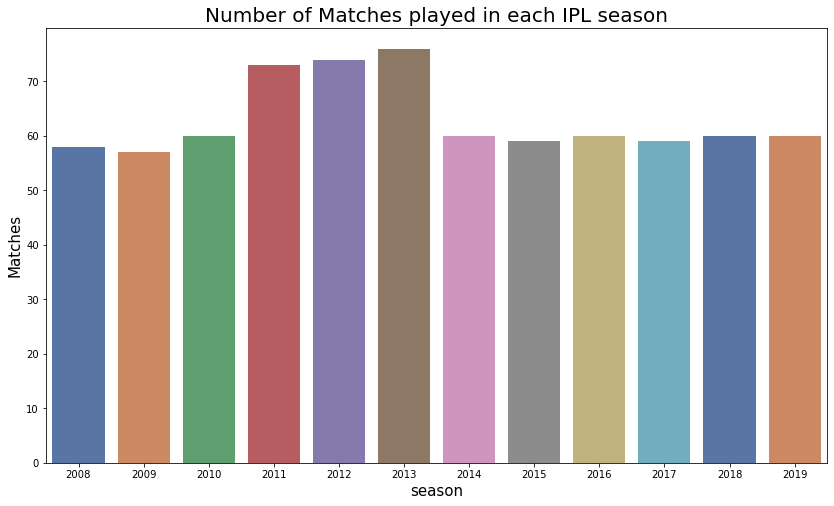

In [17]:
plt.figure(figsize = (14,8))
sns.countplot(x='season',data=matches,palette="deep")
plt.title("Number of Matches played in each IPL season",fontsize=20)
plt.xlabel("season",fontsize=15)
plt.ylabel('Matches',fontsize=15)
plt.show()

* 2013 was the season with the highest number of matches.

#### Number of matches played by teams

In [18]:
ipl_match_played=(matches.team1.value_counts()+matches.team2.value_counts()).sort_values(ascending=False)


In [19]:
ipl_match_played_df=pd.DataFrame({"Teams":list(dict(ipl_match_played).keys()),"Matches Played":list(dict(ipl_match_played).values())})
ipl_match_played_df

,Teams,Matches Played
0,Mumbai Indians,187
1,Sunrisers Hyderabad,183
2,Royal Challengers Bangalore,180
3,Kolkata Knight Riders,178
4,Delhi Capitals,177
5,Kings XI Punjab,176
6,Chennai Super Kings,164
7,Rajasthan Royals,147
8,Pune Warriors,46
9,Gujarat Lions,30


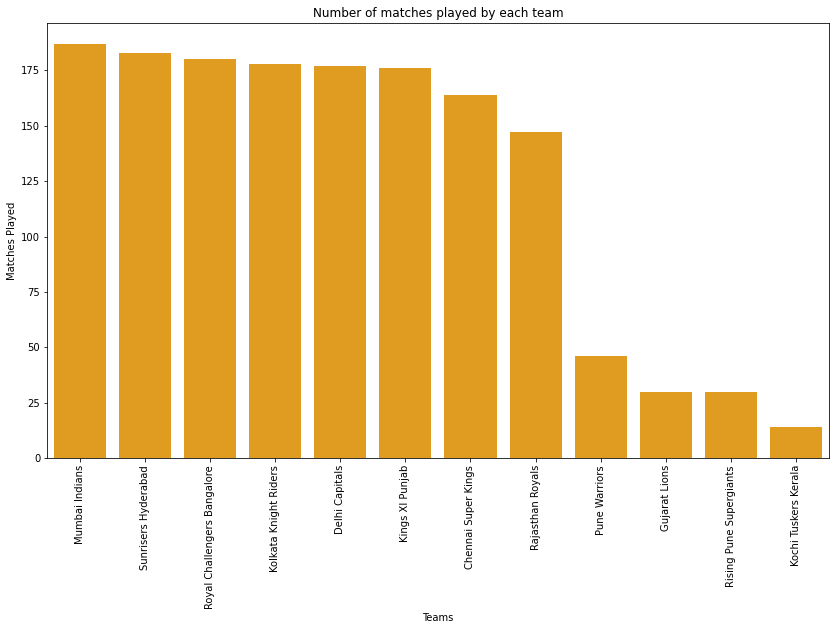

In [20]:
plt.figure(figsize=(14,8))
plt.xticks(rotation=90)
sns.barplot(x='Teams',y='Matches Played',color='orange',data=ipl_match_played_df).set(title="Number of matches played by each team");


* MI has played highest number of matches(187) followed by SRH(183). 

#### Player of the match analysis

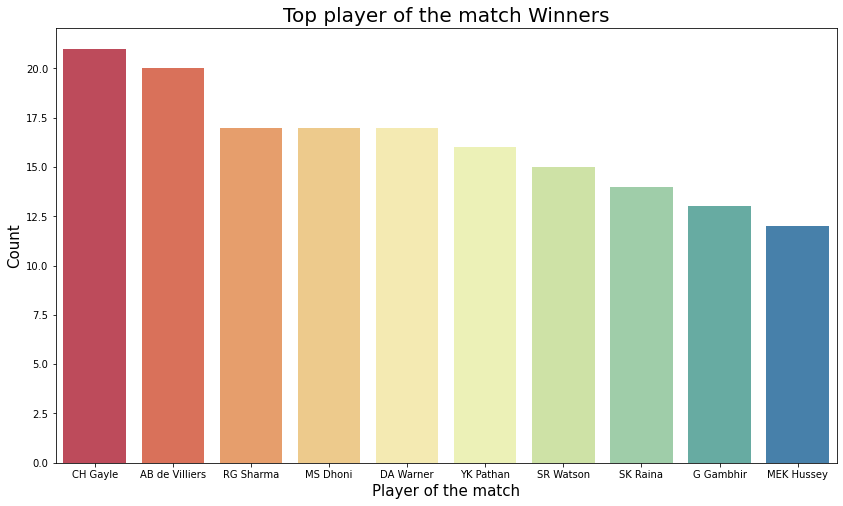

In [21]:
plt.figure(figsize = (14,8))
top_players = matches.player_of_match.value_counts()[:10]
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="Spectral")
plt.xlabel("Player of the match",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Top player of the match Winners",fontsize=20)
plt.show()

* Chris Gayle has been awarded  player of match title most number of times

#### To find out the most successful teams

In [22]:
final_matches=matches.drop_duplicates(subset=['season'], keep='last')
final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Sunrisers Hyderabad
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


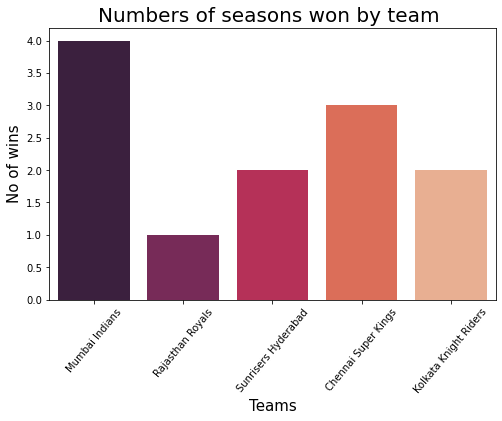

In [23]:
plt.figure(figsize = (8,5))
sns.countplot(x='winner',data=final_matches, palette='rocket')
plt.title("Numbers of seasons won by team ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Teams",fontsize=15)
plt.ylabel("No of wins",fontsize=15)
plt.show()

* MI and CSK are the most successful teams

#### MI vs CSK Matches Analysis

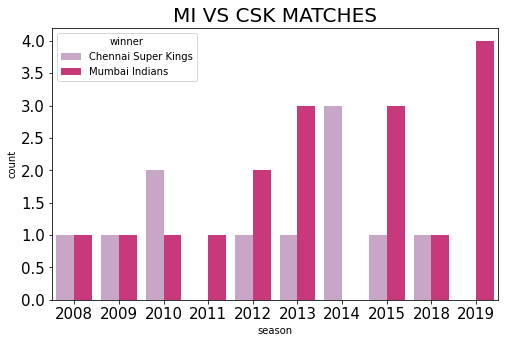

In [24]:
mt1=matches[((matches['team1']=='Chennai Super Kings')|(matches['team2']=='Chennai Super Kings'))&((matches['team1']=='Mumbai Indians')|(matches['team2']=='Mumbai Indians'))]
plt.figure(figsize=(8,5))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("MI VS CSK MATCHES",fontsize=20)
sns.countplot(x = 'season', hue='winner',data=mt1, palette='PuRd');
    
    

* Here, total count of matches won by MI is greater than CSK.

#### Finding the best batsman

In [25]:
batsman_data=deliveries.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_data=batsman_data.rename(columns={'sum':'batsman_runs'})
print(" Leading Run Scorer in IPL ")
batsman_data.iloc[:10,:]

 Leading Run Scorer in IPL 


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


* Virat Kohli has scored highest runs followed by Suresh Raina and Rohit Sharma

#### Batsmen with most boundaries in IPL History

In [26]:
four_data=deliveries[deliveries['batsman_runs']==4]
four_data = four_data.groupby('batsman')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])

In [27]:
six_data=deliveries[deliveries['batsman_runs']==6]
six_data = six_data.groupby('batsman')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

In [28]:
boundary = four_data.join(six_data, lsuffix='_left', rsuffix='_right', how='outer').drop(['runs by fours', 'runs by six'], axis=1)
boundary['fours'] = boundary['fours'].fillna(0)
boundary['sixes'] = boundary['sixes'].fillna(0)
boundary['boundaries'] = boundary['fours'] + boundary['sixes']
boundary=boundary.sort_values('boundaries', ascending=False).drop(['fours','sixes'],axis=1).reset_index().iloc[:10]

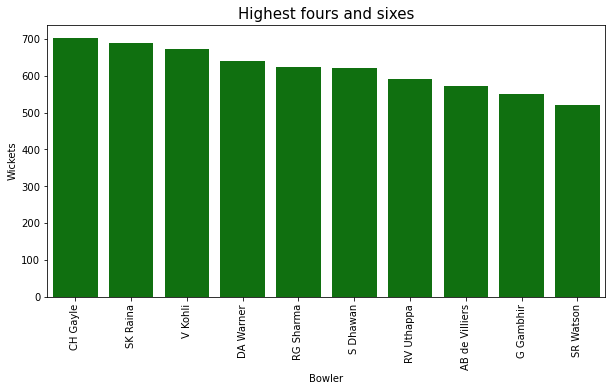

In [29]:
plt.figure(figsize = (10,5))
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
sns.barplot(x=boundary['batsman'],y=boundary['boundaries'], color='Green')
plt.title("Highest fours and sixes", fontsize=15)
plt.xlabel("Bowler")
plt.ylabel("Wickets");

* Chris Gayle has hit the highest no. of boundaries in IPL upto 2019.

#### To find the bowler who has taken highest number of wickets

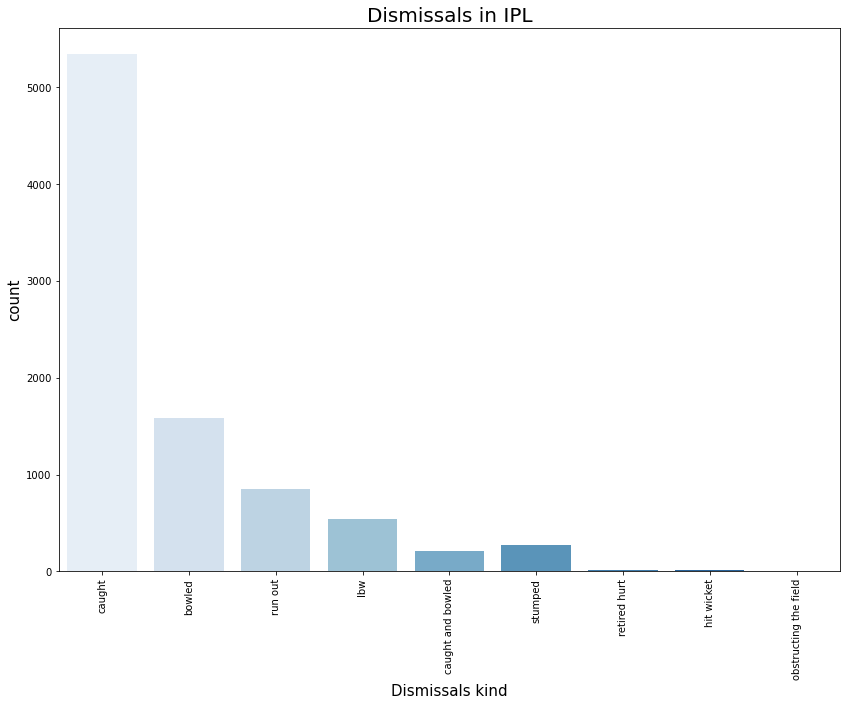

In [30]:
plt.figure(figsize=(14,10))
ax=sns.countplot(x=deliveries.dismissal_kind, palette='Blues')
plt.title("Dismissals in IPL",fontsize=20)
plt.xlabel("Dismissals kind",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [31]:
wicket_data=deliveries.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]

In [32]:
wicket_data=wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]
wicket_data

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


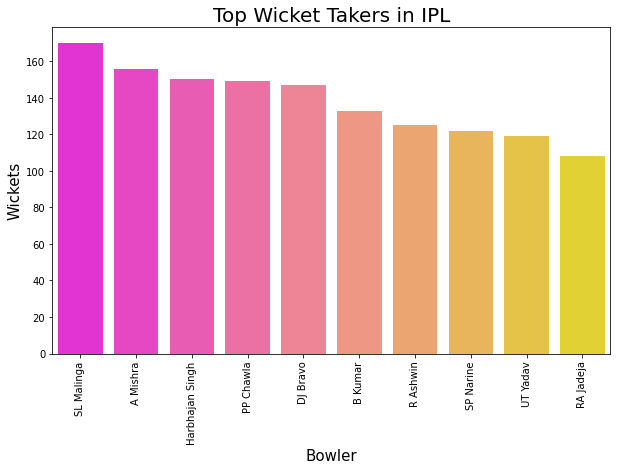

In [33]:
plt.figure(figsize=(10,6))
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
sns.barplot(x=wicket_data['bowler'],y=wicket_data['count'], palette='spring')
plt.title("Top Wicket Takers in IPL", fontsize=20)
plt.xlabel("Bowler", size = 15)
plt.ylabel("Wickets", size=15);

* Lasith Malinga has served as the best bowler by taking maximum number of wickets

#### Decision made by teams after winning a toss

In [34]:
matches['win_by']=np.where(matches['win_by_runs']>0,'Bat first','Bowl first')

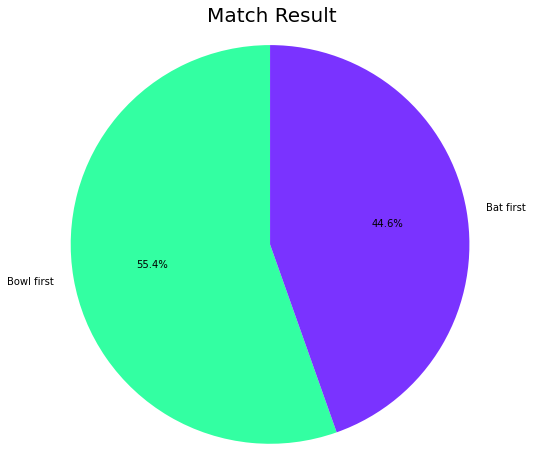

In [35]:
Win=matches.win_by.value_counts()
labels=np.array(Win.index)
sizes = Win.values
colors = ['#33FFA2', '#7A33FF']
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90)
plt.title('Match Result',fontsize=20)
plt.axis('equal')
plt.show()

* More teams choose to bowl first after winning a toss

#### How does bowling or batting first affect the result of match

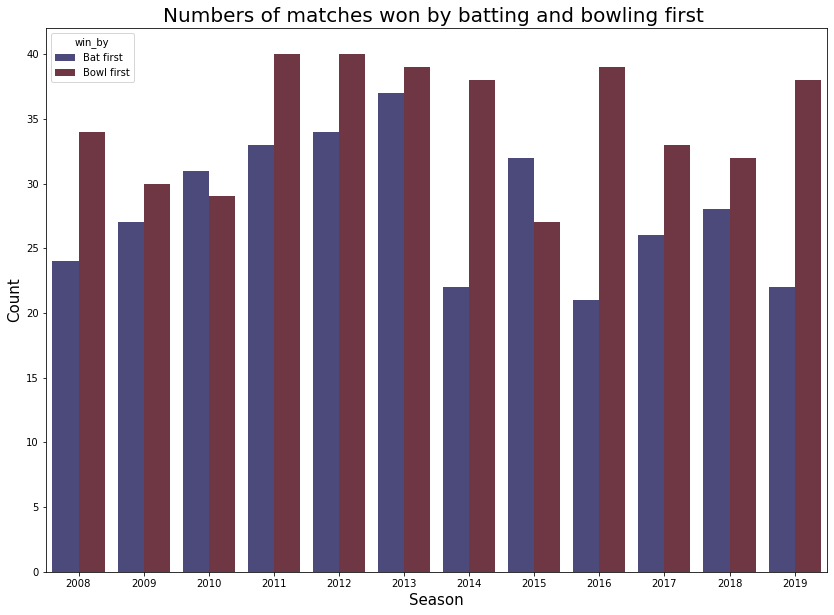

In [36]:
plt.figure(figsize = (14,10))
sns.countplot(x='season',hue='win_by',data=matches,palette='icefire')
plt.title("Numbers of matches won by batting and bowling first ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

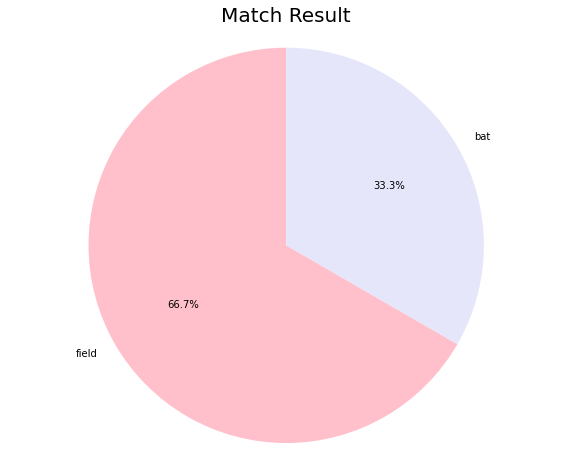

In [37]:
# Winning percentage in final
Toss=matches.toss_decision.value_counts()
final_matches=matches.drop_duplicates(subset=['season'], keep='last')
match = final_matches.win_by.value_counts()
labels=np.array(Toss.index)
sizes = match.values
colors = ['pink', 'lavender']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%',startangle=90)
plt.title('Match Result',fontsize=20)
plt.axis('equal')
plt.show()

* Generally, the team fielding first has a higher probability of winning.

#### Does winning toss influence the result of match

In [38]:
len(final_matches[final_matches['toss_winner']==final_matches['winner']]['winner'])

9

* Out of 12 final matches, 9 matches have been won by the team that won the toss.

#### Top 10 venues of IPL matches

In [39]:
top_10_venue=matches.venue.value_counts().head(10)


In [40]:
top_10_venue_df=pd.DataFrame({'Venue':top_10_venue.index,
                             'Count':top_10_venue.values})
top_10_venue_df

,Venue,Count
0,M. Chinnaswamy Stadium,80
1,Eden Gardens,77
2,Feroz Shah Kotla Ground,74
3,Wankhede Stadium,73
4,Rajiv Gandhi Intl. Cricket Stadium,64
5,M. A. Chidambaram Stadium,57
6,"Punjab Cricket Association Stadium, Mohali",56
7,Sawai Mansingh Stadium,47
8,Maharashtra Cricket Association Stadium,21
9,Subrata Roy Sahara Stadium,17


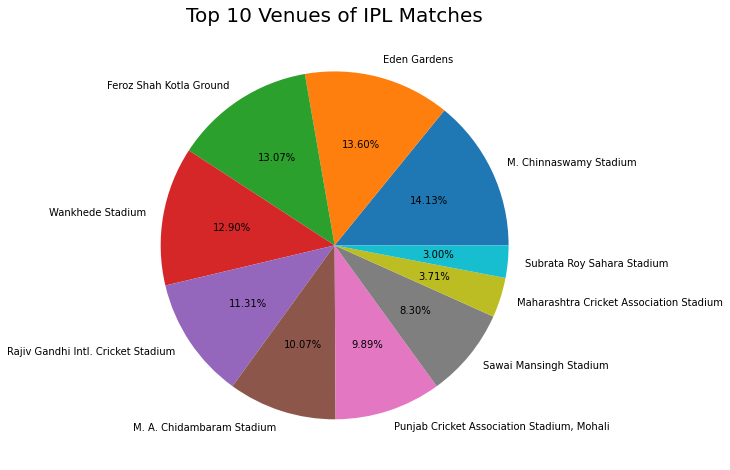

In [41]:
plt.figure(figsize = (8,8))
plt.title("Top 10 Venues of IPL Matches", fontsize=20)
plt.pie(top_10_venue_df["Count"],labels=top_10_venue_df["Venue"],autopct='%1.2f%%');

* M. Chinnaswamy Stadium tops the Venue list with 80 matches being played there followed by Eden Gardens at 77.

#### Venue Analysis

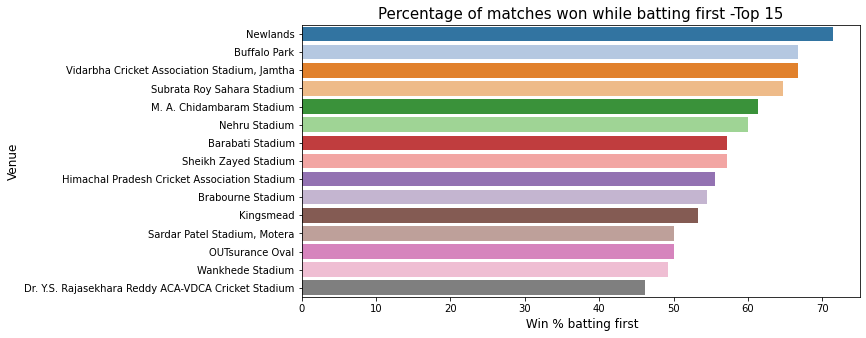

In [42]:
l = []
l.append(matches['toss_winner'][matches['toss_decision']=='bat'])
l.append(matches['team2'][(matches['toss_decision']=='field') & (matches['toss_winner'] == matches['team1'])])
l.append(matches['team1'][(matches['toss_decision']=='field') & (matches['toss_winner'] == matches['team2'])])

df=pd.DataFrame()
df = pd.DataFrame(pd.concat(l))
df = df.sort_index()
df.columns=['team']

indexes = df[(df['team'] == matches['winner'])&(df.index == matches.index)].index

df1 = pd.DataFrame()
df1['venue'] = matches['venue'].value_counts()
df1['win_count'] = matches[matches.index.isin(indexes)]['venue'].value_counts()
df1['win %'] = 100 * df1['win_count']/df1['venue'] 
df2 = df1.sort_values(by = ['win %'],ascending = False)
df2 = df2[:15]

plt.figure(figsize=(10,5))
plt.title("Percentage of matches won while batting first -Top 15",fontsize=15)
sns.barplot(x=df2['win %'], y=df2.index, palette='tab20')
plt.ylabel("Venue", size=12)
plt.xlabel(" Win % batting first", size=12);


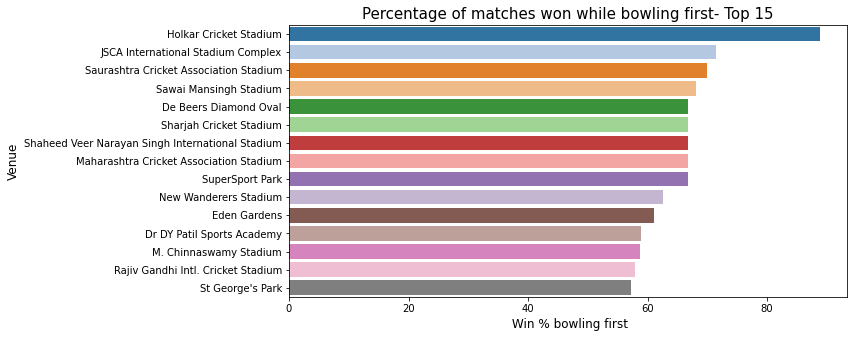

In [43]:
df1 = df1.sort_values(by = ['win %'])
df1['win % balling first'] = 100 - df1['win %']
df1 = df1[:15]

plt.figure(figsize=(10,5))
plt.title("Percentage of matches won while bowling first- Top 15",fontsize=15)
sns.barplot(x=df1['win % balling first'], y=df1.index, palette='tab20')
plt.ylabel("Venue", size=12)
plt.xlabel(" Win % bowling first", size=12);

### In conclusion:
1. The most successful teams as of 2019 are Mumbai Indians followed by Chennai Super Kings.
2. The top players of the match are Chris Gayle, AB de Villiers and Rohit Sharma.
3. The leading batsmen are Virat Kohli, Suresh Raina and Rohit Sharma.
4. Chris Gayle has a record of highest number of boundaries as of 2019 data.
4. The top bowlers are Lasith Malinga, Amit Mishra and Harbhajan Singh.
5. 75% of the final matches have been won by the team that won the toss.
6. Historically, teams that have bowled first in finals have secured victory in 67% of instances. 
7. Highest number of IPL matches have been played at M. Chinnaswamy Stadium in Bangalore.
8. Venue is also an important factor contributing towards result of the match.

### Further inferences:
1. Teams that must be taken into priority for product endorsements- MI and CSK.
2. Players like Chris Gayle, Virat Kohli, Rohit Sharma and Lasith Malinga must be considered for successful advertising campaigns.
